In [1]:
#przepisane na funkcję
import random
def tworzenie(rozmiar):
    counter_minusowych = 0
    relacje1 = []
    for x in range (0,rozmiar):
        tabPom = []
        #print("X:",x)
        for y in range (0,rozmiar):
            #print("Y",y)
            if x==y :
                #relacje1[x][y].append(0)
                tabPom.append(0)
            elif x>y:
                tabPom.append(relacje1[y][x])
            else:
                los = random.random()
                if los < 0.5:
                    #relacje1[x][y].append(-1)
                    tabPom.append(-1)
                    counter_minusowych = counter_minusowych + 1
                else:
                    #relacje1[x][y].append(1)
                    tabPom.append(1)
        relacje1.append(tabPom)
    return relacje1, counter_minusowych

In [2]:
def u_licz(delta, rozmiar, relacje1):
    suma = 0
    for i in range(rozmiar-2):
        for j in range(i+1,rozmiar-1):
            for k in range(j+1, rozmiar):
                suma = suma+relacje1[i][j]*relacje1[j][k]*relacje1[i][k]
                #print('suma ',suma)
                #print(i,j,k)
    #print(suma)
    u = -1*suma*(1/delta)
    return u

OLD

In [ ]:
#synchronicznie
import random
synchro_raj = []
synchro = []
rozmiar = 50
change = False
counter_iteracje = 0
# History to detect blinking
relacje_history_async = []
history_size_async = 3 # Keep track of the last 3 states
while len(synchro)==0 or len(synchro_raj)==0:
    counter_iteracje = counter_iteracje + 1
    print(counter_iteracje)
    print("====NEW")
    relacje1, counter_minusowych = tworzenie(rozmiar)
    delta = (rozmiar*(rozmiar-1)*(rozmiar-2))/6
    u = u_licz(delta, rozmiar, relacje1)
    u_temp = []
    counter_temp = []
    relacje_temp = []
    u_temp.append(u)
    counter_temp.append(counter_minusowych)
    relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
    change = True # Initialize change to True to enter the inner loop
    relacje_history_async = [] # Clear history for new initial matrix

    while u != -1 and change: # Add change condition to inner loop
        change = False # Reset change at the beginning of the inner loop
        #relacje2 = [row[:] for row in relacje1] # Create a copy for modification
        relacje2 = relacje1
        # Add current state to history and check for blinking
        current_relacje = [row[:] for row in relacje1]
        if current_relacje in relacje_history_async:
            print("Blinking detected (async), restarting with new initial matrix.")
            break # Break the inner loop to start a new outer loop iteration
        else:
            relacje_history_async.append(current_relacje)
        relacje_history_async.append(current_relacje)
        if len(relacje_history_async) > history_size_async:
            relacje_history_async.pop(0) # Remove the oldest state
        #print(relacje2)
        for x in range (0,rozmiar-1):
            for y in range (x+1,rozmiar):
                #print("X:",x,"Y:",y)
                wynik = 0
                for i in range(rozmiar):
                    #print('i:',i)
                    if i != x and i != y:
                        #TO CHYBA ZMIENIC
                        wynik = wynik + relacje1[x][i]*relacje1[y][i]
                        #print('wynik ',wynik)
                #signum i nadanie relacji, dla 0 sie nie zmienia
                if wynik > 0:
                    nowa_relacja = 1
                elif wynik < 0:
                    nowa_relacja = -1
                else:
                    nowa_relacja = 0
                #print('relacja ',nowa_relacja)
                if nowa_relacja != relacje1[x][y] and nowa_relacja != 0:
                    #print('zmieniam relacje')
                    change = True
                    if nowa_relacja==1:
                        counter_minusowych = counter_minusowych - 1
                    else:
                        counter_minusowych = counter_minusowych + 1
                    relacje2[x][y] = nowa_relacja
                    relacje2[y][x] = relacje2[x][y]
        relacje1 = relacje2 # Update relacje1 with changes from relacje2
        u = u_licz(delta, rozmiar, relacje1)
        u_temp.append(u)
        counter_temp.append(counter_minusowych)
        relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
        #print("u:",u)
        #print("counter", counter_minusowych)
        #print("synchro:", len(synchro))
        #print("Change: ", change)
        #print("XXXXX")
    if counter_minusowych==0 and u == -1 and len(synchro_raj)==0: # Check for u == -1 as well
        print("R A J")
        synchro_raj.append(relacje_temp)
        synchro_raj.append(u_temp)
        synchro_raj.append(counter_temp)
    elif u == -1 and len(synchro)==0: # Check for u == -1 as well
        #wpisz do synchro
        synchro.append(relacje_temp)
        synchro.append(u_temp)
        synchro.append(counter_temp)
        print("równowaga", counter_minusowych)
    else:
        print("nothing", counter_minusowych)
import pickle

pickle_out = open("sync_raj.pickle","wb")
pickle.dump(synchro, pickle_out)
pickle_out.close()

pickle_out2 = open("sync.pickle","wb")
pickle.dump(synchro_raj, pickle_out2)
pickle_out2.close()

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
550199
====NEW
nothing 600
550200
====NEW
nothing 624
550201
====NEW
nothing 609
550202
====NEW
nothing 609
550203
====NEW
nothing 609
550204
====NEW
nothing 621
550205
====NEW
nothing 625
550206
====NEW
nothing 589
550207
====NEW
nothing 616
550208
====NEW
nothing 624
550209
====NEW
nothing 624
550210
====NEW
nothing 624
550211
====NEW
nothing 621
550212
====NEW
nothing 624
550213
====NEW
nothing 621
550214
====NEW
nothing 504
550215
====NEW
nothing 600
550216
====NEW
nothing 621
550217
====NEW
nothing 621
550218
====NEW
nothing 624
550219
====NEW
nothing 625
550220
====NEW
nothing 576
550221
====NEW
nothing 621
550222
====NEW
nothing 616
550223
====NEW
nothing 625
550224
====NEW
nothing 616
550225
====NEW
nothing 621
550226
====NEW
nothing 600
550227
====NEW
nothing 525
550228
====NEW
nothing 624
550229
====NEW
nothing 600
550230
====NEW
nothing 609
550231
====NEW
nothing 624
550232
====NEW
nothing 624
550233
====NEW
no

In [ ]:
#asynchronicznie
import random
asynchro_raj = []
asynchro = []
rozmiar = 50
counter_iteracje = 0
# History to detect blinking
relacje_history_async = []
history_size_async = 5 # Keep track of the last 5 states

while len(asynchro)==0 or len(asynchro_raj)==0:
    print("====NEW")
    counter_iteracje = counter_iteracje + 1
    print(counter_iteracje)
    relacje1, counter_minusowych = tworzenie(rozmiar)
    delta = (rozmiar*(rozmiar-1)*(rozmiar-2))/6
    u = u_licz(delta, rozmiar, relacje1)
    u_temp = []
    counter_temp = []
    relacje_temp = []
    u_temp.append(u)
    counter_temp.append(counter_minusowych)
    relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
    change = False
    relacje_history_async = [] # Clear history for new initial matrix

    while u != -1:
        # Add current state to history and check for blinking
        current_relacje = [row[:] for row in relacje1]
        if current_relacje in relacje_history_async:
            print("Blinking detected (async), restarting with new initial matrix.")
            break # Break the inner loop to start a new outer loop iteration

        relacje_history_async.append(current_relacje)
        if len(relacje_history_async) > history_size_async:
            relacje_history_async.pop(0) # Remove the oldest state

        change = False
        for x in range (0,rozmiar-1):
            for y in range (x+1,rozmiar):
                #print("X:",x,"Y:",y)
                wynik = 0
                for i in range(rozmiar):
                    #print('i:',i)
                    if i != x and i != y:
                        wynik = wynik + relacje1[x][i]*relacje1[y][i]
                        #print('wynik ',wynik)
                #signum i nadanie relacji, dla 0 sie nie zmienia
                if wynik > 0:
                    nowa_relacja = 1
                elif wynik < 0:
                    nowa_relacja = -1
                else:
                    nowa_relacja = 0
                #print('relacja ',nowa_relacja)
                if nowa_relacja != relacje1[x][y] and nowa_relacja != 0:
                    #print('zmieniam relacje')
                    change = True
                    if nowa_relacja==1:
                        counter_minusowych = counter_minusowych - 1
                    else:
                        counter_minusowych = counter_minusowych + 1
                    relacje1[x][y] = nowa_relacja
                    relacje1[y][x] = relacje1[x][y]
        u = u_licz(delta, rozmiar, relacje1)
        u_temp.append(u)
        counter_temp.append(counter_minusowych)
        relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
        #print("u:",u)
        #print("counter", counter_minusowych)
        #print("synchro:", len(asynchro))
        #print("raj:", len(asynchro_raj))
        #print("Change: ", change)
        #print("XXXXX")
        if not change and u != -1: # If no changes were made and u is not -1, it's stuck
             print("Stuck in a local minimum (async), restarting with new initial matrix.")
             break

    if counter_minusowych==0 and u == -1 and len(asynchro_raj)==0:
        print("R A J")
        asynchro_raj.append(relacje_temp)
        asynchro_raj.append(u_temp)
        asynchro_raj.append(counter_temp)
    elif u == -1 and len(asynchro)==0:
        #wpisz do synchro
        asynchro.append(relacje_temp)
        asynchro.append(u_temp)
        asynchro.append(counter_temp)
        print("równowaga", counter_minusowych)
    else:
        print("nothing", counter_minusowych)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
counter 24
synchro: 3
raj: 0
Change:  True
XXXXX
nothing 24
====NEW
412
u: -0.4666666666666667
counter 25
synchro: 3
raj: 0
Change:  True
XXXXX
u: -1.0
counter 24
synchro: 3
raj: 0
Change:  True
XXXXX
nothing 24
====NEW
413
u: -0.6666666666666666
counter 24
synchro: 3
raj: 0
Change:  True
XXXXX
u: -1.0
counter 24
synchro: 3
raj: 0
Change:  True
XXXXX
nothing 24
====NEW
414
u: -0.8666666666666667
counter 24
synchro: 3
raj: 0
Change:  True
XXXXX
u: -1.0
counter 25
synchro: 3
raj: 0
Change:  True
XXXXX
nothing 25
====NEW
415
u: -0.6666666666666666
counter 21
synchro: 3
raj: 0
Change:  True
XXXXX
u: -1.0
counter 21
synchro: 3
raj: 0
Change:  True
XXXXX
nothing 21
====NEW
416
u: -0.7666666666666666
counter 25
synchro: 3
raj: 0
Change:  True
XXXXX
u: -1.0
counter 25
synchro: 3
raj: 0
Change:  True
XXXXX
nothing 25
====NEW
417
u: -0.26666666666666666
counter 24
synchro: 3
raj: 0
Change:  True
XXXXX
u: -0.7666666666666666
counter

NEW

In [3]:
#synchronicznie
import random
import copy
synchro_raj = []
synchro = []
rozmiar = 50
change = False
counter_iteracje = 0
# History to detect blinking
relacje_history_async = []
history_size_async = 3 # Keep track of the last 3 states
limit = 0
while limit < 5001:
#while len(synchro)==0 or len(synchro_raj)==0:
    limit = limit+1
    counter_iteracje = counter_iteracje + 1
    print(counter_iteracje)
    print("====NEW")
    relacje1, counter_minusowych = tworzenie(rozmiar)
    delta = (rozmiar*(rozmiar-1)*(rozmiar-2))/6
    u = u_licz(delta, rozmiar, relacje1)
    liczba_polaczen = rozmiar*(rozmiar-1)/2
    xij = (counter_minusowych * -1 + (liczba_polaczen-counter_minusowych))/liczba_polaczen
    xij_temp = []
    xij_temp.append(xij)
    u_temp = []
    counter_temp = []
    relacje_temp = []
    u_temp.append(u)
    counter_temp.append(counter_minusowych)
    #relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
    relacje_temp.append(copy.deepcopy(relacje1))
    change = True # Initialize change to True to enter the inner loop
    relacje_history_async = [] # Clear history for new initial matrix

    while u != -1 and change: # Add change condition to inner loop
        change = False # Reset change at the beginning of the inner loop
        #relacje2 = [row[:] for row in relacje1] # Create a copy for modification
        relacje2 = copy.deepcopy(relacje1)
        # Add current state to history and check for blinking
        current_relacje = copy.deepcopy(relacje1)
        if current_relacje in relacje_history_async:
            print("Blinking detected (async), restarting with new initial matrix.")
            break # Break the inner loop to start a new outer loop iteration
        else:
            relacje_history_async.append(current_relacje)
        relacje_history_async.append(current_relacje)
        if len(relacje_history_async) > history_size_async:
            relacje_history_async.pop(0) # Remove the oldest state
        #print(relacje2)
        for x in range (0,rozmiar-1):
            for y in range (x+1,rozmiar):
                #print("X:",x,"Y:",y)
                wynik = 0
                for i in range(rozmiar):
                    #print('i:',i)
                    if i != x and i != y:
                        #TO CHYBA ZMIENIC
                        wynik = wynik + relacje1[x][i]*relacje1[y][i]
                        #print('wynik ',wynik)
                #signum i nadanie relacji, dla 0 sie nie zmienia
                if wynik > 0:
                    nowa_relacja = 1
                elif wynik < 0:
                    nowa_relacja = -1
                else:
                    nowa_relacja = 0
                #print('relacja ',nowa_relacja)
                if nowa_relacja != relacje1[x][y] and nowa_relacja != 0:
                    #print('zmieniam relacje')
                    change = True
                    if nowa_relacja==1:
                        counter_minusowych = counter_minusowych - 1
                    else:
                        counter_minusowych = counter_minusowych + 1
                    relacje2[x][y] = nowa_relacja
                    relacje2[y][x] = relacje2[x][y]
        relacje1 = copy.deepcopy(relacje2) # Update relacje1 with changes from relacje2
        u = u_licz(delta, rozmiar, relacje1)
        xij = (counter_minusowych * -1 + (liczba_polaczen-counter_minusowych))/liczba_polaczen
        xij_temp.append(xij)
        u_temp.append(u)
        relacje_temp.append(copy.deepcopy(relacje1))
        #counter_temp.append(counter_minusowych)
        #relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
        #print("u:",u)
        #print("counter", counter_minusowych)
        #print("synchro:", len(synchro))
        #print("Change: ", change)
        #print("XXXXX")
    if counter_minusowych==0 and u == -1 and len(synchro_raj)==0: # Check for u == -1 as well
        print("R A J")
        synchro_raj2 = []
        synchro_raj2.append(relacje_temp)
        synchro_raj2.append(u_temp)
        synchro_raj2.append(xij_temp)
        synchro_raj.append(synchro_raj2)
    elif u == -1: # Check for u == -1 as well
        #wpisz do synchro
        synchro2 = []
        synchro2.append(relacje_temp)
        synchro2.append(u_temp)
        synchro2.append(xij_temp)
        synchro.append(synchro2)
        print("równowaga", xij)
    else:
        print("nothing", counter_minusowych)
import pickle

pickle_out = open("sync_raj.pickle","wb")
pickle.dump(synchro, pickle_out)
pickle_out.close()

pickle_out2 = open("sync.pickle","wb")
pickle.dump(synchro_raj, pickle_out2)
pickle_out2.close()

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
3338
====NEW
równowaga -0.013877551020408163
3339
====NEW
równowaga -0.013877551020408163
3340
====NEW
równowaga -0.018775510204081632
3341
====NEW
równowaga -0.02040816326530612
3342
====NEW
równowaga -0.02040816326530612
3343
====NEW
równowaga 0.005714285714285714
3344
====NEW
równowaga -0.018775510204081632
3345
====NEW
równowaga -0.013877551020408163
3346
====NEW
równowaga -0.02040816326530612
3347
====NEW
równowaga -0.02040816326530612
3348
====NEW
równowaga -0.018775510204081632
3349
====NEW
równowaga -0.018775510204081632
3350
====NEW
równowaga -0.013877551020408163
3351
====NEW
równowaga -0.018775510204081632
3352
====NEW
równowaga -0.005714285714285714
3353
====NEW
równowaga -0.018775510204081632
3354
====NEW
równowaga -0.018775510204081632
3355
====NEW
równowaga 0.005714285714285714
3356
====NEW
równowaga 0.005714285714285714
3357
====NEW
równowaga 0.005714285714285714
3358
====NEW
równowaga -0.00571428571428571

In [4]:
#asynchronicznie
import random
import copy
asynchro_raj = []
asynchro = []
rozmiar = 50
counter_iteracje = 0
# History to detect blinking
relacje_history_async = []
history_size_async = 5 # Keep track of the last 5 states
limit = 0
while limit < 5001:
#while len(asynchro)==0 or len(asynchro_raj)==0:
    limit = limit +1
    print("====NEW")
    counter_iteracje = counter_iteracje + 1
    print(counter_iteracje)
    relacje1, counter_minusowych = tworzenie(rozmiar)
    delta = (rozmiar*(rozmiar-1)*(rozmiar-2))/6
    u = u_licz(delta, rozmiar, relacje1)
    u_temp = []
    counter_temp = []
    relacje_temp = []
    liczba_polaczen = rozmiar*(rozmiar-1)/2
    xij = (counter_minusowych * -1 + (liczba_polaczen-counter_minusowych))/liczba_polaczen
    xij_temp = []
    xij_temp.append(xij)
    u_temp.append(u)
    counter_temp.append(counter_minusowych)
    #relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
    relacje_temp.append(copy.deepcopy(relacje1))
    change = False
    relacje_history_async = [] # Clear history for new initial matrix

    while u != -1:
        # Add current state to history and check for blinking
        current_relacje = copy.deepcopy(relacje1)
        if current_relacje in relacje_history_async:
            print("Blinking detected (async), restarting with new initial matrix.")
            break # Break the inner loop to start a new outer loop iteration

        relacje_history_async.append(current_relacje)
        if len(relacje_history_async) > history_size_async:
            relacje_history_async.pop(0) # Remove the oldest state

        change = False
        for x in range (0,rozmiar-1):
            for y in range (x+1,rozmiar):
                #print("X:",x,"Y:",y)
                wynik = 0
                for i in range(rozmiar):
                    #print('i:',i)
                    if i != x and i != y:
                        wynik = wynik + relacje1[x][i]*relacje1[y][i]
                        #print('wynik ',wynik)
                #signum i nadanie relacji, dla 0 sie nie zmienia
                if wynik > 0:
                    nowa_relacja = 1
                elif wynik < 0:
                    nowa_relacja = -1
                else:
                    nowa_relacja = 0
                #print('relacja ',nowa_relacja)
                if nowa_relacja != relacje1[x][y] and nowa_relacja != 0:
                    #print('zmieniam relacje')
                    change = True
                    if nowa_relacja==1:
                        counter_minusowych = counter_minusowych - 1
                    else:
                        counter_minusowych = counter_minusowych + 1
                    relacje1[x][y] = nowa_relacja
                    relacje1[y][x] = relacje1[x][y]
        u = u_licz(delta, rozmiar, relacje1)
        u_temp.append(u)
        counter_temp.append(counter_minusowych)
        relacje_temp.append(copy.deepcopy(relacje1))
        xij = (counter_minusowych * -1 + (liczba_polaczen-counter_minusowych))/liczba_polaczen
        xij_temp.append(xij)
        #relacje_temp.append([row[:] for row in relacje1]) # Append a copy of the matrix
        #print("u:",u)
        #print("counter", counter_minusowych)
        #print("synchro:", len(asynchro))
        #print("raj:", len(asynchro_raj))
        #print("Change: ", change)
        #print("XXXXX")
        if not change and u != -1: # If no changes were made and u is not -1, it's stuck
             print("Stuck in a local minimum (async), restarting with new initial matrix.")
             break

    if counter_minusowych==0 and u == -1 and len(asynchro_raj)==0:
        print("R A J")
        asynchro_raj2 = []
        asynchro_raj2.append(relacje_temp)
        asynchro_raj2.append(u_temp)
        asynchro_raj2.append(xij_temp)
        asynchro_raj.append(asynchro_raj2)
    elif u == -1 and len(asynchro)==0:
        #wpisz do synchro
        asynchro2 = []
        asynchro2.append(relacje_temp)
        asynchro2.append(u_temp)
        asynchro2.append(xij_temp)
        asynchro.append(asynchro2)
        print("równowaga", counter_minusowych)
    else:
        print("nothing", counter_minusowych)

pickle_out = open("async_raj.pickle","wb")
pickle.dump(asynchro_raj, pickle_out)
pickle_out.close()

pickle_out2 = open("async.pickle","wb")
pickle.dump(asynchro, pickle_out2)
pickle_out2.close()

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
====NEW
3349
nothing 600
====NEW
3350
nothing 561
====NEW
3351
nothing 609
====NEW
3352
nothing 621
====NEW
3353
nothing 609
====NEW
3354
nothing 576
====NEW
3355
nothing 589
====NEW
3356
nothing 609
====NEW
3357
nothing 624
====NEW
3358
nothing 621
====NEW
3359
nothing 589
====NEW
3360
nothing 624
====NEW
3361
nothing 621
====NEW
3362
nothing 600
====NEW
3363
nothing 624
====NEW
3364
nothing 616
====NEW
3365
nothing 616
====NEW
3366
nothing 625
====NEW
3367
nothing 624
====NEW
3368
nothing 621
====NEW
3369
nothing 616
====NEW
3370
nothing 621
====NEW
3371
nothing 616
====NEW
3372
nothing 624
====NEW
3373
nothing 589
====NEW
3374
nothing 624
====NEW
3375
nothing 624
====NEW
3376
nothing 625
====NEW
3377
nothing 589
====NEW
3378
nothing 609
====NEW
3379
nothing 624
====NEW
3380
nothing 625
====NEW
3381
nothing 589
====NEW
3382
nothing 624
====NEW
3383
nothing 609
====NEW
3384
nothing 589
====NEW
3385
nothing 624
====NEW
33

In [ ]:
for x in range(0,len(synchro[0][0])):
  print(synchro[0][0][x][0])
print("======")
for x in range(0,len(asynchro[0][0])):
  print(asynchro[0][0][x][0])

[0, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1]
[0, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1]
[0, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1]
[0, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1]
[0, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1]
[0, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 

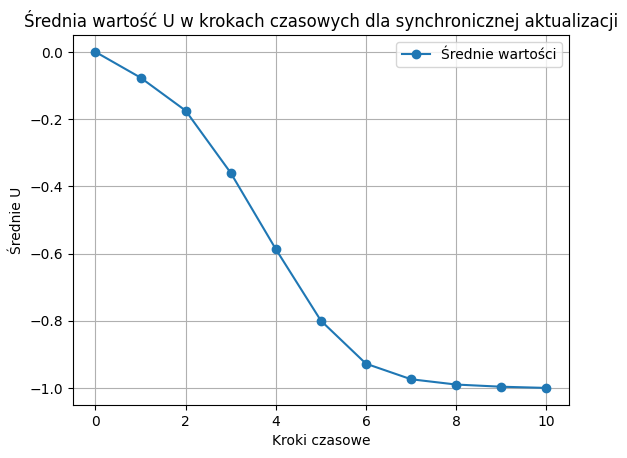

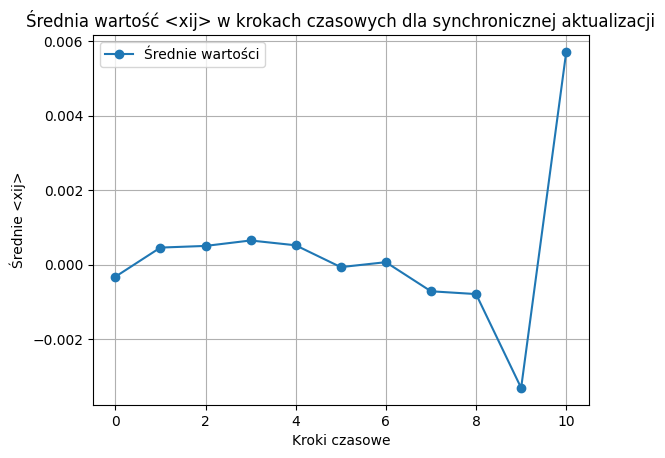

In [5]:
import numpy as np
from itertools import zip_longest
u_s = []
xij_s = []
for x in synchro:
  u_s.append(x[1])
  xij_s.append(x[2])
u_sAVG = []
xij_sAVG = []
for group in zip_longest(*u_s, fillvalue=np.nan):  # wypełnia brakujące wartości NaN
    avg = np.nanmean(group)                      # liczy średnią pomijając NaN
    u_sAVG.append(avg)

for group in zip_longest(*xij_s, fillvalue=np.nan):  # wypełnia brakujące wartości NaN
    avg = np.nanmean(group)                      # liczy średnią pomijając NaN
    xij_sAVG.append(avg)

import matplotlib.pyplot as plt
time = list(range(len(u_sAVG)))
plt.plot(time, u_sAVG, marker='o', label='Średnie wartości')
plt.xlabel("Kroki czasowe")
plt.ylabel("Średnie U")
plt.title("Średnia wartość U w krokach czasowych dla synchronicznej aktualizacji")
plt.grid(True)
plt.legend()
plt.show()
####
time = list(range(len(xij_sAVG)))
plt.plot(time, xij_sAVG, marker='o', label='Średnie wartości')
plt.xlabel("Kroki czasowe")
plt.ylabel("Średnie <xij>")
plt.title("Średnia wartość <xij> w krokach czasowych dla synchronicznej aktualizacji")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
len(u_sAVG)

4

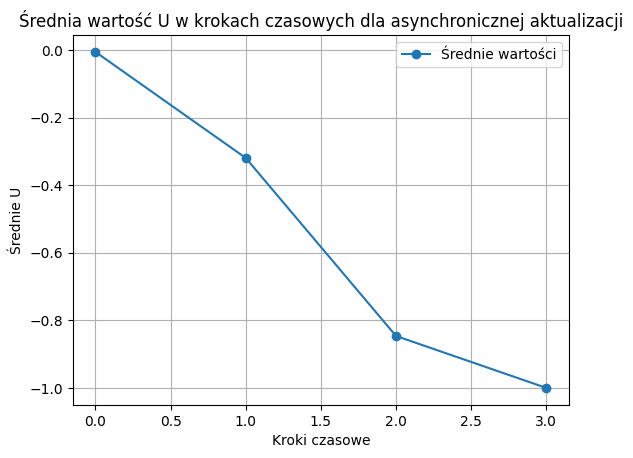

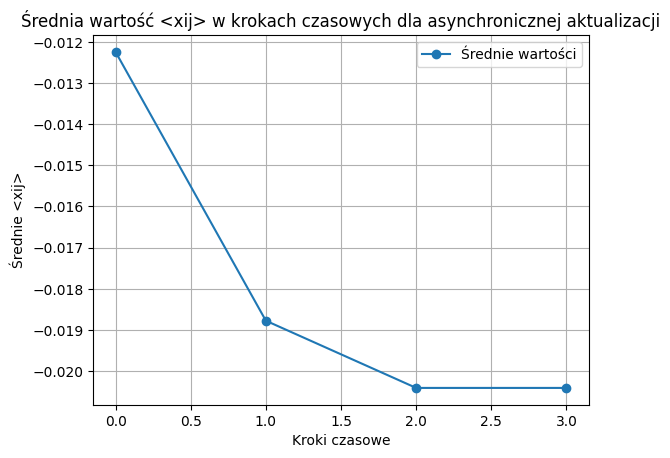

In [6]:
u_s = []
xij_s = []
for x in asynchro:
  u_s.append(x[1])
  xij_s.append(x[2])
u_sAVG = []
xij_sAVG = []
for group in zip_longest(*u_s, fillvalue=np.nan):  # wypełnia brakujące wartości NaN
    avg = np.nanmean(group)                      # liczy średnią pomijając NaN
    u_sAVG.append(avg)

for group in zip_longest(*xij_s, fillvalue=np.nan):  # wypełnia brakujące wartości NaN
    avg = np.nanmean(group)                      # liczy średnią pomijając NaN
    xij_sAVG.append(avg)

time = list(range(len(u_sAVG)))
plt.plot(time, u_sAVG, marker='o', label='Średnie wartości')
plt.xlabel("Kroki czasowe")
plt.ylabel("Średnie U")
plt.title("Średnia wartość U w krokach czasowych dla asynchronicznej aktualizacji")
plt.grid(True)
plt.legend()
plt.show()
####
time = list(range(len(xij_sAVG)))
plt.plot(time, xij_sAVG, marker='o', label='Średnie wartości')
plt.xlabel("Kroki czasowe")
plt.ylabel("Średnie <xij>")
plt.title("Średnia wartość <xij> w krokach czasowych dla asynchronicznej aktualizacji")
plt.grid(True)
plt.legend()
plt.show()

In [17]:
print(len(asynchro[0][0]))
print(len(synchro[0][0]))

4
8


In [18]:
import csv
import pandas as pd
nodes = []
for x in range (1,51):
  nodes.append({"Id":x})

df_n = pd.DataFrame(nodes)
df_n.to_csv("nodes.csv", index=False)
#edges.csv - kolumny Source (x), Target (y), Weight (wartosc), Type (Undirected)
'''
#funkcja przelatująca przez wszystkie relacje na dole
for x in range (0,rozmiar-1):
    for y in range (x+1,rozmiar):
        print("X:",x,"Y:",y)

print(synchro[0][0]) #zbiór matryc z pojedynczej iteracji
print(synchro[0][0][0]) #pojedyncza matryca
print(synchro[0][0][0][0]) #pierwszy dolny rząd pojedynczej matrycy
for x in range (0,rozmiar-1):
    for y in range (x+1,rozmiar):
        #print("X:",x,"Y:",y)
'''
#SYNCHRO
len(synchro[0][0]) #4
ds0 = []
ds1 = []
ds2 = []
ds3 = []
ds4 = []
ds5 = []
ds6 = []
ds7 = []
for x in range (0,rozmiar-1):
    for y in range (x+1,rozmiar):
        #print("X:",x,"Y:",y)
        ds0.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][0][x][y]+2, "Type": "Undirected"})
        ds1.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][1][x][y]+2, "Type": "Undirected"})
        ds2.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][2][x][y]+2, "Type": "Undirected"})
        ds3.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][3][x][y]+2, "Type": "Undirected"})
        ds4.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][4][x][y]+2, "Type": "Undirected"})
        ds5.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][5][x][y]+2, "Type": "Undirected"})
        ds6.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][6][x][y]+2, "Type": "Undirected"})
        ds7.append({"Source": x+1, "Target": y+1, "Weight": synchro[0][0][7][x][y]+2, "Type": "Undirected"})
#ASYNCHRO
len(asynchro[0][0]) #4
da0 = []
da1 = []
da2 = []
da3 = []
for x in range (0,rozmiar-1):
    for y in range (x+1,rozmiar):
        #print("X:",x,"Y:",y)
        da0.append({"Source": x+1, "Target": y+1, "Weight": asynchro[0][0][0][x][y]+2, "Type": "Undirected"})
        da1.append({"Source": x+1, "Target": y+1, "Weight": asynchro[0][0][1][x][y]+2, "Type": "Undirected"})
        da2.append({"Source": x+1, "Target": y+1, "Weight": asynchro[0][0][2][x][y]+2, "Type": "Undirected"})
        da3.append({"Source": x+1, "Target": y+1, "Weight": asynchro[0][0][3][x][y]+2, "Type": "Undirected"})

df_ds0 = pd.DataFrame(ds0)
df_ds0.to_csv("edges_s0.csv", index=False)
df_ds1 = pd.DataFrame(ds1)
df_ds1.to_csv("edges_s1.csv", index=False)
df_ds2 = pd.DataFrame(ds2)
df_ds2.to_csv("edges_s2.csv", index=False)
df_ds3 = pd.DataFrame(ds3)
df_ds3.to_csv("edges_s3.csv", index=False)
df_ds4 = pd.DataFrame(ds4)
df_ds4.to_csv("edges_s4.csv", index=False)
df_ds5 = pd.DataFrame(ds5)
df_ds5.to_csv("edges_s5.csv", index=False)
df_ds6 = pd.DataFrame(ds6)
df_ds6.to_csv("edges_s6.csv", index=False)
df_ds7 = pd.DataFrame(ds7)
df_ds7.to_csv("edges_s7.csv", index=False)
#
df_da0 = pd.DataFrame(da0)
df_da0.to_csv("edges_a0.csv", index=False)
df_da1 = pd.DataFrame(da1)
df_da1.to_csv("edges_a1.csv", index=False)
df_da2 = pd.DataFrame(da2)
df_da2.to_csv("edges_a2.csv", index=False)
df_da3 = pd.DataFrame(da3)
df_da3.to_csv("edges_a3.csv", index=False)